In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import string
import json

import spacy
from spacy.tokens import Doc

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import confusion_matrix
import seaborn as sns

from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm

import pickle



from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.model_selection import ValidationCurveDisplay,validation_curve


# spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")

In [2]:
import pandas as pd

# Read the JSON file with lines=True
dataframe = pd.read_json("D:/sheharyar/sonal_news_dataset/News_Category_Dataset_v3.json", lines=True)

# Display the first few rows of the dataframe
dataframe.head()


,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


# Data Exploration

In [3]:
dataframe.describe()

C:\Users\Muskan Computer\AppData\Local\Temp\ipykernel_4572\2687677596.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dataframe.describe()


,link,headline,category,short_description,authors,date
count,209527,209527,209527,209527,209527,209527
unique,209486,207996,42,187022,29169,3890
top,https://www.huffingtonpost.comhttps://www.wash...,Sunday Roundup,POLITICS,,,2014-03-25 00:00:00
freq,2,90,35602,19712,37418,100
first,NaN,NaN,NaN,NaN,NaN,2012-01-28 00:00:00
last,NaN,NaN,NaN,NaN,NaN,2022-09-23 00:00:00


## Let's verify if there exist empty line in the dataset

In [4]:
#show the empty lines in the [headline] column
dataframe.loc[dataframe["headline"] == ""]

,link,headline,category,short_description,authors,date
90944,https://www.huffingtonpost.com/entry/lincoln-2...,,POLITICS,,"Robert Moran, ContributorRobert Moran leads Br...",2015-08-22
95567,https://www.huffingtonpost.com/entry/post_9671...,,RELIGION,Let everyone not wrapped in tired and disprove...,"Matthew Fox, ContributorRadical theologian Mat...",2015-06-30
103675,https://www.huffingtonpost.com/entry/us-and-eu...,,WORLDPOST,,"Natasha Srdoc, ContributorAuthor, Economist, C...",2015-03-29
109100,https://www.huffingtonpost.com/entry/disney-ce...,,BUSINESS,,"Gary Snyder, ContributorWriter and Media Strat...",2015-01-25
110153,https://www.huffingtonpost.com/entry/beverly-h...,,MEDIA,,"Gary Snyder, ContributorWriter and Media Strat...",2015-01-13
122145,https://www.huffingtonpost.com/entry/beverly-h...,,QUEER VOICES,,"Gary Snyder, ContributorWriter and Media Strat...",2014-08-28


In [5]:
#show the empty lines in the [short_description] column
dataframe.loc[dataframe["short_description"] == "",]

,link,headline,category,short_description,authors,date
20773,https://www.huffingtonpost.com/entry/the-big-b...,The Big Blue Wave,COMEDY,,"Shan Wells, ContributorSciency sun venerator +...",2017-11-10
21523,https://www.huffingtonpost.com/entry/inside-ru...,"Inside Rukban Camp, One Of Syria’s Most Desper...",WORLD NEWS,,"Yasser Allawi, Syria Deeply",2017-10-31
22793,https://www.huffingtonpost.com/entry/syrian-re...,Syrian Refugees Return From Lebanon Only To Fl...,WORLD NEWS,,"Abby Sewell, Refugees Deeply",2017-10-14
32223,https://www.huffingtonpost.com/entry/your-guid...,Your Guide To The Best BBQ In St. Louis Accord...,TASTE,,,2017-06-19
34488,https://www.huffingtonpost.com/entry/the-bechd...,The Bechdel Test,COMEDY,,"Hilary Fitzgerald Campbell, ContributorHilary'...",2017-05-24
...,...,...,...,...,...,...
206924,https://www.huffingtonpost.com/entry/true-lgbt...,True LGBTQ Stories: When A College Football Te...,QUEER VOICES,,"Nathan Manske, Contributor\nExecutive Director...",2012-02-25
206939,https://www.huffingtonpost.com/entry/chasing-i...,'Chasing Ice' -- The Climate Change Debate Is ...,ENVIRONMENT,,"Greg Reitman, Contributor\nFounder of Blue Wat...",2012-02-25
208803,https://www.huffingtonpost.com/entry/love-is-l...,Practice for International Kissing Day: 'Love ...,IMPACT,,"Karen Dalton-Beninato, Contributor\nWriter Nea...",2012-02-05
208865,https://www.huffingtonpost.com/entry/zach-hust...,"Zach Huston, Victim of Brutal Ohio School Bull...",QUEER VOICES,,"Ian Thompson, Contributor\nLegislative Represe...",2012-02-04


In [6]:
dataframe

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
...,...,...,...,...,...,...
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28


In [7]:
def removeEmptyLine(df, col_name):
    # Replace empty strings with np.nan
    df[col_name].replace("", np.nan, inplace=True)
    # Ensure pd.NA is treated as a missing value and drop rows with missing values
    df.dropna(subset=[col_name], inplace=True)
    return df

# Example usage:
# Assuming 'dataframe' is your DataFrame
dataframe = removeEmptyLine(dataframe, "headline")
dataframe = removeEmptyLine(dataframe, "short_description")

In [8]:
dataframe = removeEmptyLine(dataframe, "headline")
dataframe = removeEmptyLine(dataframe, "short_description")

## Let's create a graphic to show how many items each category of news have in the data

863


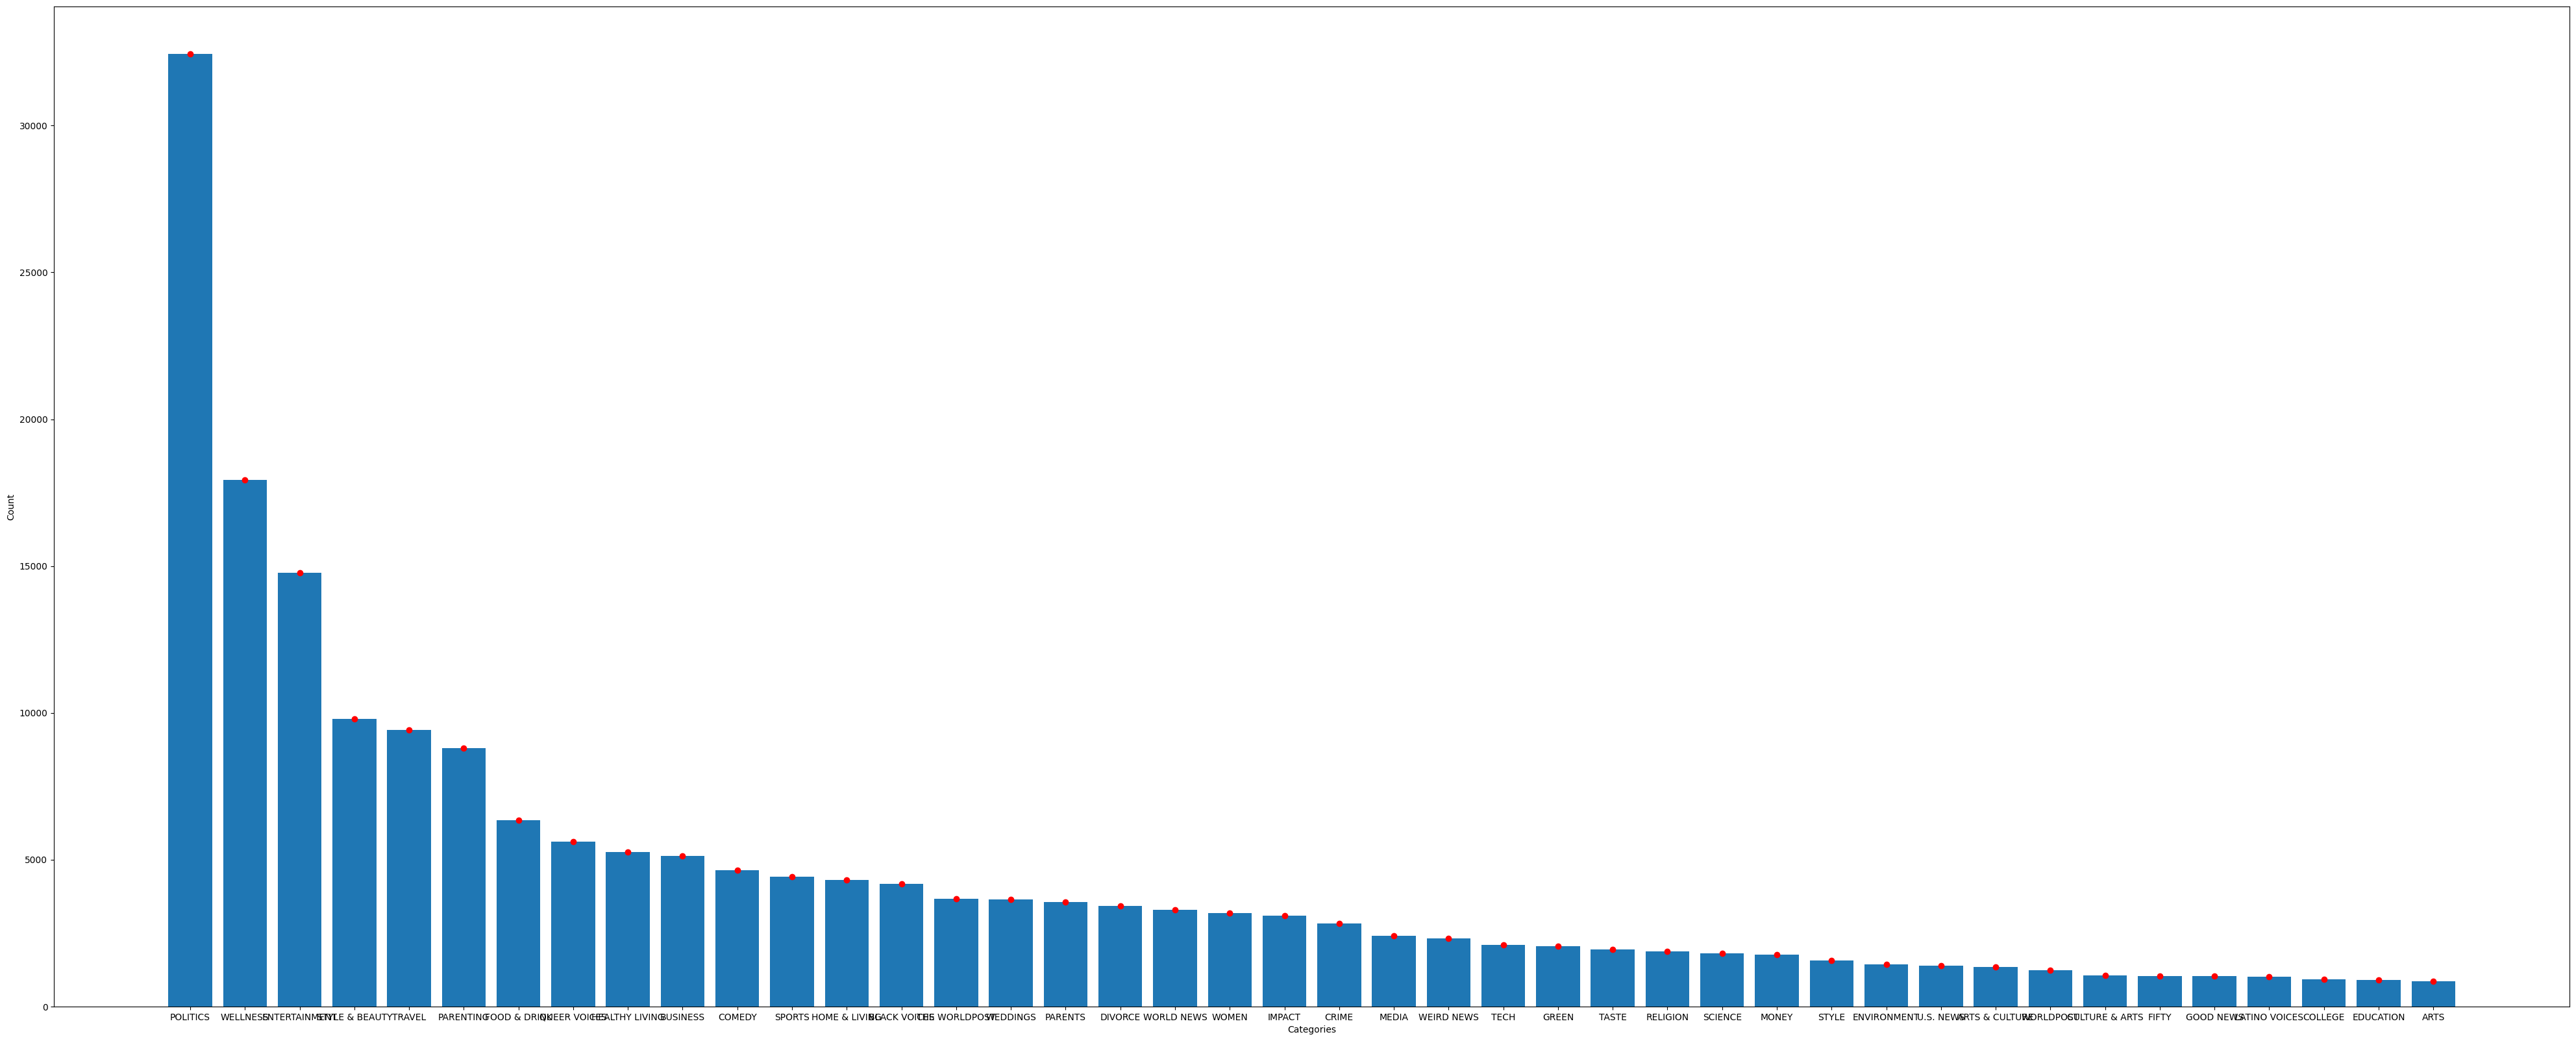

In [9]:
count_df = pd.DataFrame(dataframe.groupby(["category"]).count()["headline"].sort_values(ascending=False),columns=["headline"])
print(dataframe.groupby(["category"]).count()["headline"].min())
plt.figure(figsize=(50,20))
plt.xlabel("Categories")
plt.ylabel("Count")
plt.bar(count_df.index,count_df["headline"])
plt.plot(count_df.index,count_df["headline"],'ro')

## Let's get only the categories with more than 4000 news

In [10]:
#get the category with number of news more than 4000
category_list = count_df.loc[count_df["headline"] >= 4000].index.to_list()
category_list

['POLITICS',
 'WELLNESS',
 'ENTERTAINMENT',
 'STYLE & BEAUTY',
 'TRAVEL',
 'PARENTING',
 'FOOD & DRINK',
 'QUEER VOICES',
 'HEALTHY LIVING',
 'BUSINESS',
 'COMEDY',
 'SPORTS',
 'HOME & LIVING',
 'BLACK VOICES']

In [11]:
# category_list = [
#     'POLITICS',
#     'WELLNESS',
#     'ENTERTAINMENT',
#     'TRAVEL',
#     'STYLE & BEAUTY',
#     'PARENTING',
#     'HEALTHY LIVING',
#     'QUEER VOICES',
#     'FOOD & DRINK',
#     'BUSINESS',
#     'COMEDY',
#     'SPORTS',
#     'HOME & LIVING',
#     'BLACK VOICES'
# ]

my_list = []
for cat in category_list:
    my_list.append(dataframe.loc[dataframe["category"] == cat,['headline','category','short_description']].head(1000))
df = pd.concat(my_list, ignore_index=True)
df["full_new"] = df["headline"] +' '+ df["short_description"]
df

,headline,category,short_description,full_new
0,Biden Says U.S. Forces Would Defend Taiwan If ...,POLITICS,President issues vow as tensions with China rise.,Biden Says U.S. Forces Would Defend Taiwan If ...
1,‘Beautiful And Sad At The Same Time’: Ukrainia...,POLITICS,An annual celebration took on a different feel...,‘Beautiful And Sad At The Same Time’: Ukrainia...
2,Biden Says Queen's Death Left 'Giant Hole' For...,POLITICS,"U.S. President Joe Biden, in London for the fu...",Biden Says Queen's Death Left 'Giant Hole' For...
3,Bill To Help Afghans Who Escaped Taliban Faces...,POLITICS,Republican outrage over the shoddy U.S. withdr...,Bill To Help Afghans Who Escaped Taliban Faces...
4,Mark Meadows Complies With Justice Dept. Subpo...,POLITICS,The former White House chief of staff has turn...,Mark Meadows Complies With Justice Dept. Subpo...
...,...,...,...,...
13995,Timid Reporting On Racism Skews Our Political ...,BLACK VOICES,The truth behind “economic populism” and “iden...,Timid Reporting On Racism Skews Our Political ...
13996,"'Everything, Everything' Answers Calls For Mor...",BLACK VOICES,"Even in 2017, the market for films with women ...","'Everything, Everything' Answers Calls For Mor..."
13997,New Orleans Principal Fired After Video Captur...,BLACK VOICES,He was already being investigated after photos...,New Orleans Principal Fired After Video Captur...
13998,How Moonlight Muted Me,BLACK VOICES,I saw Moonlight for the first time at the begi...,How Moonlight Muted Me I saw Moonlight for the...


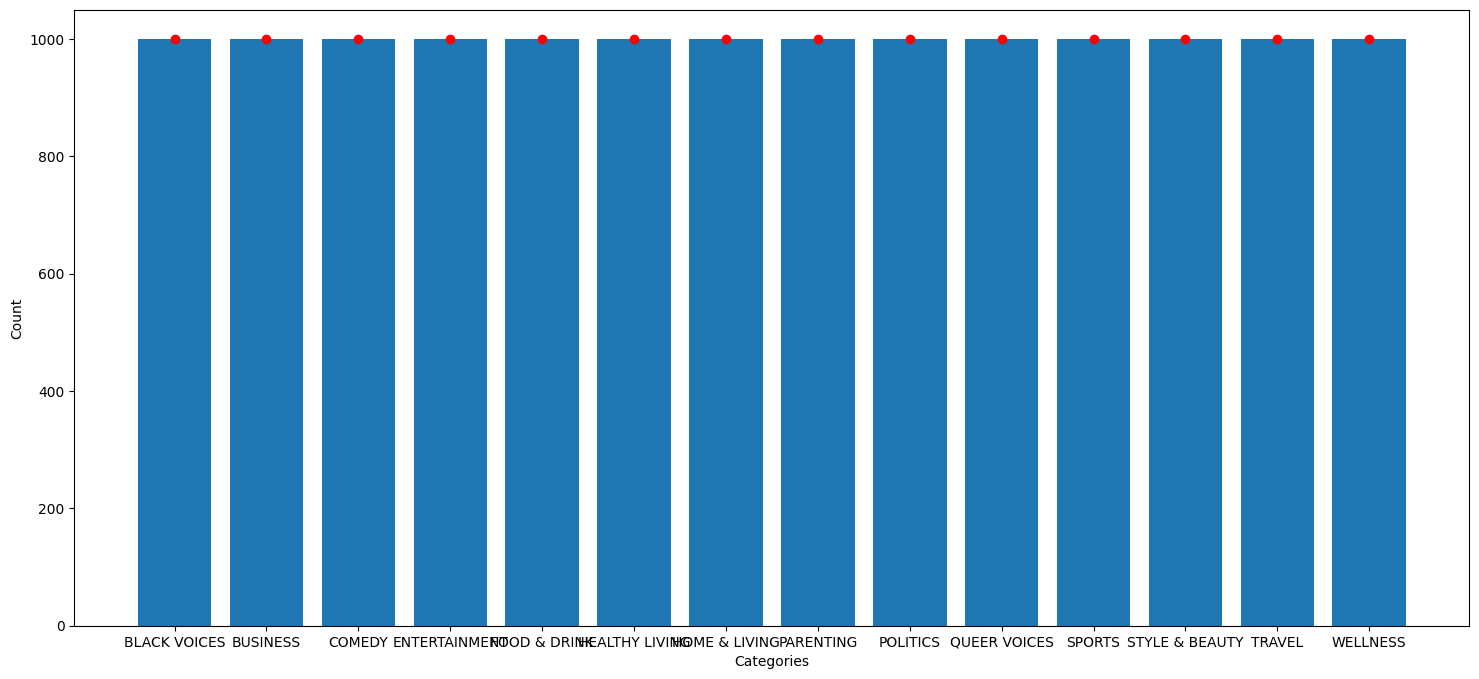

In [12]:
count_df = pd.DataFrame(df.groupby(["category"]).count()["full_new"].sort_values(ascending=False))

plt.figure(figsize=(18,8))
plt.xlabel("Categories")
plt.ylabel("Count")
plt.bar(count_df.index,count_df["full_new"])
plt.plot(count_df.index,count_df["full_new"],'ro')

In [13]:
df

,headline,category,short_description,full_new
0,Biden Says U.S. Forces Would Defend Taiwan If ...,POLITICS,President issues vow as tensions with China rise.,Biden Says U.S. Forces Would Defend Taiwan If ...
1,‘Beautiful And Sad At The Same Time’: Ukrainia...,POLITICS,An annual celebration took on a different feel...,‘Beautiful And Sad At The Same Time’: Ukrainia...
2,Biden Says Queen's Death Left 'Giant Hole' For...,POLITICS,"U.S. President Joe Biden, in London for the fu...",Biden Says Queen's Death Left 'Giant Hole' For...
3,Bill To Help Afghans Who Escaped Taliban Faces...,POLITICS,Republican outrage over the shoddy U.S. withdr...,Bill To Help Afghans Who Escaped Taliban Faces...
4,Mark Meadows Complies With Justice Dept. Subpo...,POLITICS,The former White House chief of staff has turn...,Mark Meadows Complies With Justice Dept. Subpo...
...,...,...,...,...
13995,Timid Reporting On Racism Skews Our Political ...,BLACK VOICES,The truth behind “economic populism” and “iden...,Timid Reporting On Racism Skews Our Political ...
13996,"'Everything, Everything' Answers Calls For Mor...",BLACK VOICES,"Even in 2017, the market for films with women ...","'Everything, Everything' Answers Calls For Mor..."
13997,New Orleans Principal Fired After Video Captur...,BLACK VOICES,He was already being investigated after photos...,New Orleans Principal Fired After Video Captur...
13998,How Moonlight Muted Me,BLACK VOICES,I saw Moonlight for the first time at the begi...,How Moonlight Muted Me I saw Moonlight for the...


In [14]:
def removeEmptyRow(df,col_name):
    df.replace([" ","","_","__"], pd.NA, inplace = True)
    df.dropna(subset=[col_name], inplace=True)
    return df

In [15]:
df = removeEmptyRow(df,"full_new")
df.head()

,headline,category,short_description,full_new
0,Biden Says U.S. Forces Would Defend Taiwan If ...,POLITICS,President issues vow as tensions with China rise.,Biden Says U.S. Forces Would Defend Taiwan If ...
1,‘Beautiful And Sad At The Same Time’: Ukrainia...,POLITICS,An annual celebration took on a different feel...,‘Beautiful And Sad At The Same Time’: Ukrainia...
2,Biden Says Queen's Death Left 'Giant Hole' For...,POLITICS,"U.S. President Joe Biden, in London for the fu...",Biden Says Queen's Death Left 'Giant Hole' For...
3,Bill To Help Afghans Who Escaped Taliban Faces...,POLITICS,Republican outrage over the shoddy U.S. withdr...,Bill To Help Afghans Who Escaped Taliban Faces...
4,Mark Meadows Complies With Justice Dept. Subpo...,POLITICS,The former White House chief of staff has turn...,Mark Meadows Complies With Justice Dept. Subpo...


In [24]:
df['short_description']

0        President issues vow as tensions with China rise.
1        An annual celebration took on a different feel...
2        U.S. President Joe Biden, in London for the fu...
3        Republican outrage over the shoddy U.S. withdr...
4        The former White House chief of staff has turn...
                               ...                        
13995    The truth behind “economic populism” and “iden...
13996    Even in 2017, the market for films with women ...
13997    He was already being investigated after photos...
13998    I saw Moonlight for the first time at the begi...
13999    Well there it is, America. Greg Gianforte has ...
Name: short_description, Length: 14000, dtype: object

# Let's make functions

## Function to do text preprocessing: remove number, remove punctuation, remove stop_words, convert to lower case, and make lemmatization

In [16]:
def text_preprocessing(df,col_name):
    all_doc = []
    for index,row in df.iterrows():
        doc = nlp(row[col_name])
        token_text = []
        for token in doc:
            if not(token.like_num or token.is_punct or token.is_stop):
                token_text.append(str(token.lemma_).lower())
        token_text = " ".join(token_text)
        all_doc.append(token_text)    
    df.loc[:,col_name] = all_doc
    return df

In [17]:
df = text_preprocessing(df,"full_new")
df

,headline,category,short_description,full_new
0,Biden Says U.S. Forces Would Defend Taiwan If ...,POLITICS,President issues vow as tensions with China rise.,biden say u.s. force defend taiwan china invad...
1,‘Beautiful And Sad At The Same Time’: Ukrainia...,POLITICS,An annual celebration took on a different feel...,beautiful sad time ukrainian cultural festival...
2,Biden Says Queen's Death Left 'Giant Hole' For...,POLITICS,"U.S. President Joe Biden, in London for the fu...",biden say queen death left giant hole royal fa...
3,Bill To Help Afghans Who Escaped Taliban Faces...,POLITICS,Republican outrage over the shoddy U.S. withdr...,bill help afghans escape taliban face long odd...
4,Mark Meadows Complies With Justice Dept. Subpo...,POLITICS,The former White House chief of staff has turn...,mark meadows complies justice dept subpoena re...
...,...,...,...,...
13995,Timid Reporting On Racism Skews Our Political ...,BLACK VOICES,The truth behind “economic populism” and “iden...,timid reporting racism skews political economi...
13996,"'Everything, Everything' Answers Calls For Mor...",BLACK VOICES,"Even in 2017, the market for films with women ...",answer call movies women color woman market fi...
13997,New Orleans Principal Fired After Video Captur...,BLACK VOICES,He was already being investigated after photos...,new orleans principal fired video capture wear...
13998,How Moonlight Muted Me,BLACK VOICES,I saw Moonlight for the first time at the begi...,moonlight mute see moonlight time beginning in...


## Function to transform word doc to vector using TF-IDF and split data into train and test

In [18]:
def tfIdf(df,col_name,target_col_name):
    vectorizer = TfidfVectorizer()
    feature = vectorizer.fit_transform(df.loc[:,col_name])
    tdf_df = pd.DataFrame(feature.toarray(),columns=vectorizer.get_feature_names_out())
    X_train, X_test , y_train, y_test = train_test_split(feature.toarray(),df.loc[:,target_col_name],random_state = 42)
    return X_train, X_test,y_train,y_test

## Function to show confusion matrix

In [19]:
def confused_matrix(y_test, y_pred,labels):
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred,labels = labels)

    # Display the confusion matrix
    plt.figure(figsize=(10, 10))  # Sets the figure size
    sns.heatmap(cm, annot=True, fmt="d",xticklabels = labels,yticklabels = labels,)  # Plots the confusion matrix as a heatmap
    plt.title('Confusion matrix')  # Sets the title of the plot
    plt.ylabel('Actual label')  # Sets the label of the y-axis
    plt.xlabel('Predicted label')  # Sets the label of the x-axis
    plt.show()  # Displays the plot

In [20]:
X_train, X_test,y_train,y_test = tfIdf(df,'full_new','category')

In [21]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (10500, 23286)
X_test shape: (3500, 23286)
y_train shape: (10500,)
y_test shape: (3500,)


In [22]:
from sklearn.feature_extraction.text import CountVectorizer
def find_common_words(df, col_name, top_n=10):
    # Initialize the CountVectorizer
    vectorizer = CountVectorizer()
    
    # Fit and transform the full_new column
    word_counts = vectorizer.fit_transform(df[col_name])
    
    # Sum up the counts of each word
    word_sum = word_counts.sum(axis=0)
    
    # Create a dictionary of words and their counts
    word_freq = [(word, word_sum[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    
    # Sort the words by frequency in descending order
    word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)
    
    # Return the top n words
    return word_freq[:top_n]

# Example usage
top_common_words = find_common_words(df, 'full_new', top_n=50)
print(top_common_words)

[('say', 1404), ('trump', 1377), ('new', 1335), ('year', 1048), ('time', 926), ('people', 891), ('day', 864), ('like', 852), ('know', 775), ('home', 750), ('good', 713), ('way', 683), ('black', 681), ('want', 672), ('life', 670), ('look', 666), ('thing', 641), ('need', 607), ('come', 588), ('photo', 571), ('week', 562), ('world', 561), ('go', 551), ('love', 549), ('think', 538), ('find', 522), ('get', 520), ('star', 494), ('child', 479), ('woman', 451), ('kid', 444), ('donald', 440), ('help', 433), ('right', 433), ('video', 427), ('take', 417), ('work', 414), ('tell', 407), ('house', 398), ('health', 394), ('president', 393), ('make', 392), ('old', 391), ('feel', 384), ('late', 384), ('food', 382), ('man', 373), ('big', 369), ('bad', 352), ('family', 351)]


In [30]:
y_train

13836    BLACK VOICES
9937         BUSINESS
10861          COMEDY
11225          SPORTS
11459          SPORTS
             ...     
5191        PARENTING
13418    BLACK VOICES
5390        PARENTING
860          POLITICS
7270     QUEER VOICES
Name: category, Length: 10500, dtype: object